In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as image

NAMES = ['wb97x', 'delta_emle_total']

In [2]:
def get_shift(x, y, z):
    x0, y0 = -82.5, -12.5 # Position of global minimum
    xy = np.array([x, y]).T
    diff = np.abs(xy - np.array([x0, y0]))
    sum_diff = np.sum(diff, axis=1)
    idx = np.argmin(sum_diff) # idx of global minimum
    return z[idx]

def read_pmf(filename):
    return np.loadtxt(filename).T[:3]

def shift_pmf(pmf):
    x, y, z = pmf
    return np.array([x, y, z - get_shift(x, y, z)])

In [3]:
full_data = {name: shift_pmf(read_pmf(f'data/{name}.PMF')) for name in NAMES}
mask = np.mean(np.array([v[2,:] for v in full_data.values()]), axis=0) < 1000
masked_data = {k: v[:,mask] for k, v in full_data.items()}

In [4]:
pmf_data = {k: v.reshape(3, 72, 72) for k, v in full_data.items()}

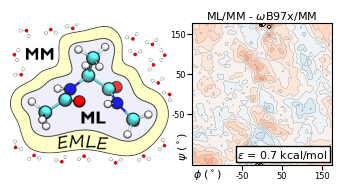

In [5]:
x, y = pmf_data['wb97x'][:2]
z = pmf_data['delta_emle_total'][2] - pmf_data['wb97x'][2]
levels = np.linspace(-6, 6, 25)

ticks = np.arange(-50, 160, 100)

plt.rc('figure', facecolor='w')
plt.rc('font', size=8)

fig, (ax_img, ax_pmf) = plt.subplots(1, 2, figsize=(3.25, 1.75), gridspec_kw={'width_ratios': [1.15, 1]})
fig.subplots_adjust(left=0.0, right=1, top=1, bottom=0, wspace=-0.3, hspace=0.)

ax_img.xaxis.set_visible(False)
ax_img.yaxis.set_visible(False)
ax_img.set_frame_on(False)
img = image.imread(f'data/adp_toc.png')
ax_img.imshow(img)

cp = ax_pmf.contourf(x, y, z, cmap='RdBu', levels=levels)
ax_pmf.contour(x, y, z, levels=levels, colors='black', 
               linewidths=0.1, linestyles='solid')

ax_pmf.set_xlabel("$\phi$ ($^\circ$)", labelpad=-2)
ax_pmf.set_ylabel("$\psi$ ($^\circ$)", labelpad=-5)
ax_pmf.xaxis.set_label_coords(0.11, -0.02)
ax_pmf.yaxis.set_label_coords(-0.01, 0.13)
ax_pmf.set_xticks(ticks, ticks, rotation=0, fontsize=6)
ax_pmf.set_yticks(ticks, ticks, fontsize=6)
plt.tick_params(axis='both', which='major', pad=1)

label_frame = patches.Rectangle((-67, -170), 239, 40, facecolor='white', 
                                edgecolor='black', zorder=2)
ax_pmf.add_patch(label_frame)
ax_pmf.text(166, -161, '$\epsilon$ = 0.7 kcal/mol', 
            fontsize=8, ha='right')
ax_pmf.set_title('ML/MM - $\omega$B97x/MM', fontsize=8, pad=0)

plt.tight_layout(pad=0.1)
plt.savefig('TOC.tif', dpi=300)
plt.show()